In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.src.losses import mean_absolute_error
import tensorflow as tf

In [2]:
data = pd.read_csv('Housing.csv')

In [3]:
data.replace({'yes': 1, 'no': 0}, inplace=True)
data = data.join(pd.get_dummies(data.furnishingstatus)).drop('furnishingstatus', axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_9836\1366455863.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'yes': 1, 'no': 0}, inplace=True)


In [469]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    int64
 6   guestroom        545 non-null    int64
 7   basement         545 non-null    int64
 8   hotwaterheating  545 non-null    int64
 9   airconditioning  545 non-null    int64
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    int64
 12  furnished        545 non-null    bool 
 13  semi-furnished   545 non-null    bool 
 14  unfurnished      545 non-null    bool 
dtypes: bool(3), int64(12)
memory usage: 52.8 KB


In [4]:
data.dropna(inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    int64
 6   guestroom        545 non-null    int64
 7   basement         545 non-null    int64
 8   hotwaterheating  545 non-null    int64
 9   airconditioning  545 non-null    int64
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    int64
 12  furnished        545 non-null    bool 
 13  semi-furnished   545 non-null    bool 
 14  unfurnished      545 non-null    bool 
dtypes: bool(3), int64(12)
memory usage: 52.8 KB


In [5]:
from sklearn.model_selection import train_test_split

x = data.drop(['price'], axis=1)
y = data['price']

In [6]:
xTrain, xTest, yTrain, yTest =  train_test_split(x,y,test_size=0.2)

In [7]:
train_data = xTrain.join(yTrain)

array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>],
       [<Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>],
       [<Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

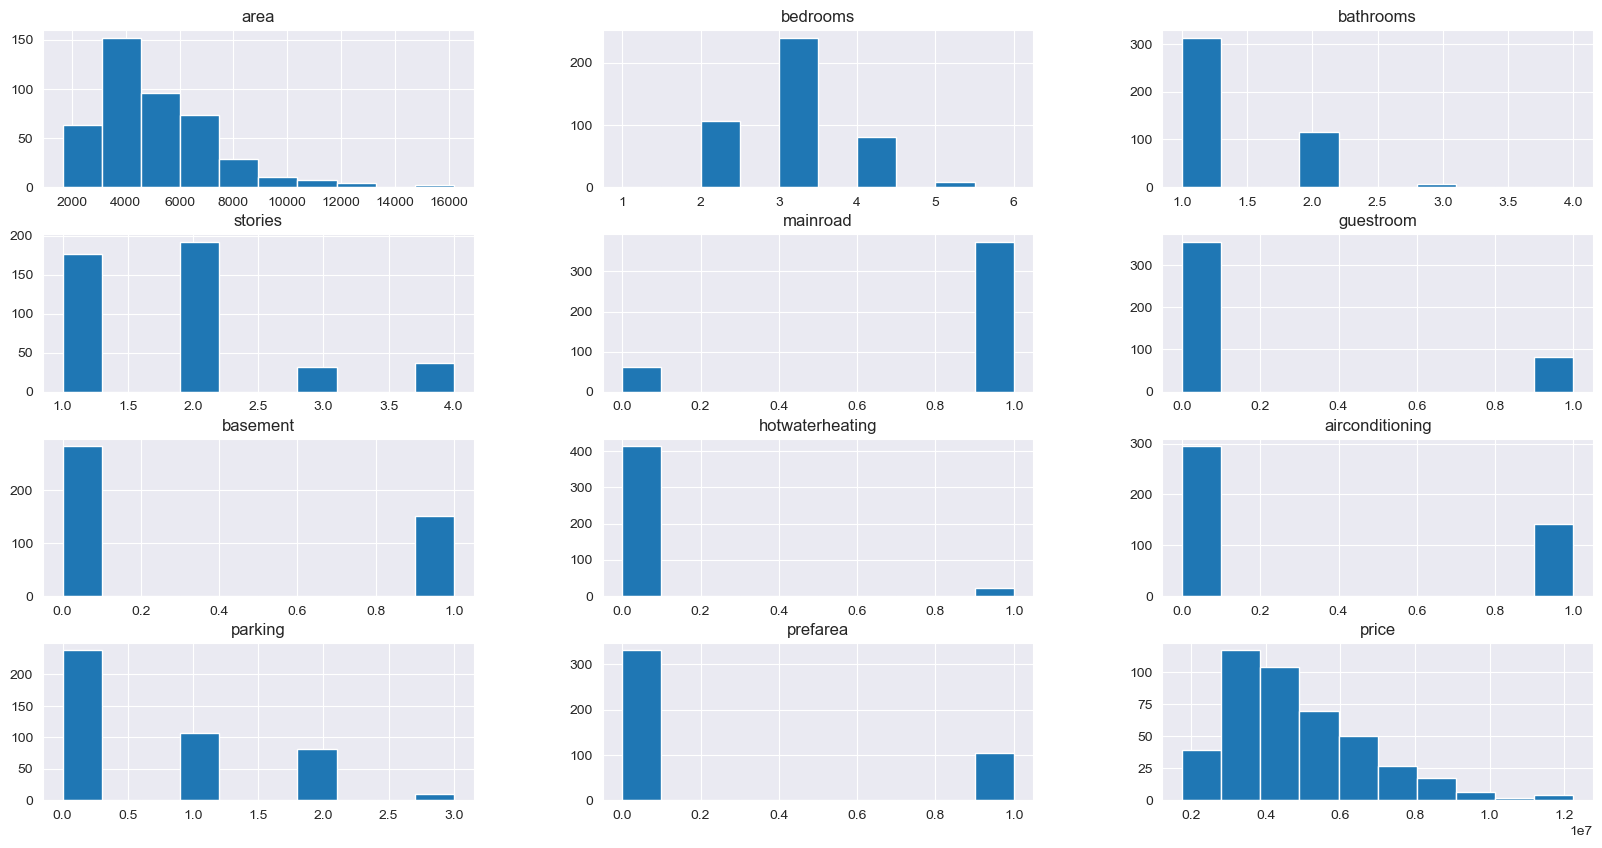

In [433]:
train_data.hist(figsize=(20,10))

In [434]:
train_data.corr()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished,price
area,1.000000,0.169858,0.169574,0.108785,0.307054,0.177244,0.047726,-0.046855,0.232771,0.344896,0.270416,0.108814,0.010934,-0.114788,0.556832
bedrooms,0.169858,1.000000,0.350164,0.394435,-0.011551,0.094602,0.106751,0.035343,0.167871,0.115212,0.104447,0.045638,0.055717,-0.102016,0.366966
bathrooms,0.169574,0.350164,1.000000,0.329525,0.034421,0.125394,0.108747,0.029042,0.201767,0.143958,0.058317,0.060347,0.039216,-0.098589,0.484729
stories,0.108785,0.394435,0.329525,1.000000,0.132063,0.035896,-0.201080,0.019374,0.318016,0.047288,0.044575,0.048767,0.002954,-0.049394,0.434136
mainroad,0.307054,-0.011551,0.034421,0.132063,1.000000,0.126946,0.022252,-0.026148,0.155137,0.212837,0.213961,0.128015,0.019412,-0.141942,0.313260
guestroom,0.177244,0.094602,0.125394,0.035896,0.126946,1.000000,0.393051,-0.029289,0.161432,0.050207,0.172303,0.096673,0.008936,-0.101160,0.292892
basement,0.047726,0.106751,0.108747,-0.201080,0.022252,0.393051,1.000000,-0.014726,0.029263,0.064362,0.263336,0.089190,0.044970,-0.132025,0.189595
hotwaterheating,-0.046855,0.035343,0.029042,0.019374,-0.026148,-0.029289,-0.014726,1.000000,-0.136971,0.071975,-0.056318,-0.021370,0.063216,-0.046326,0.056881
airconditioning,0.232771,0.167871,0.201767,0.318016,0.155137,0.161432,0.029263,-0.136971,1.000000,0.172248,0.115172,0.167787,-0.078617,-0.076402,0.482009
parking,0.344896,0.115212,0.143958,0.047288,0.212837,0.050207,0.064362,0.071975,0.172248,1.000000,0.105289,0.124304,0.042801,-0.163064,0.395065


<Axes: >

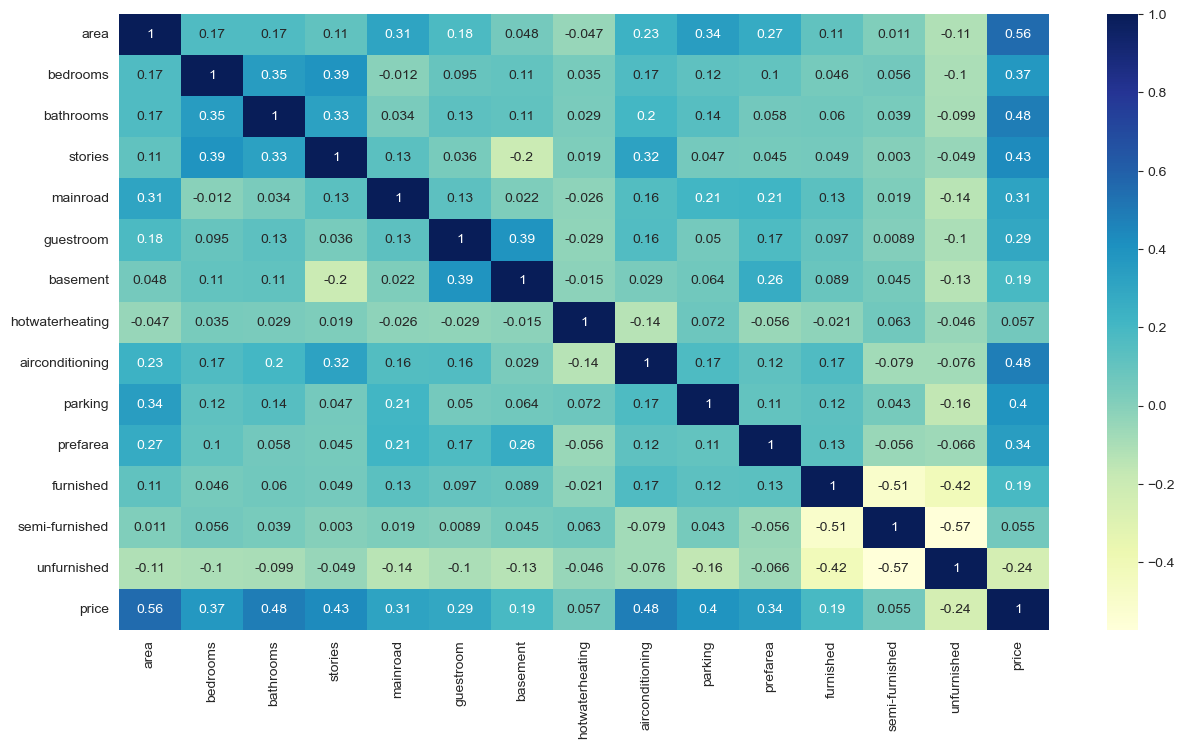

In [435]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [8]:
train_data['area'] = np.log(train_data['area']) + 1
train_data['price'] = np.log(train_data['price']) + 1

array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>],
       [<Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>],
       [<Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

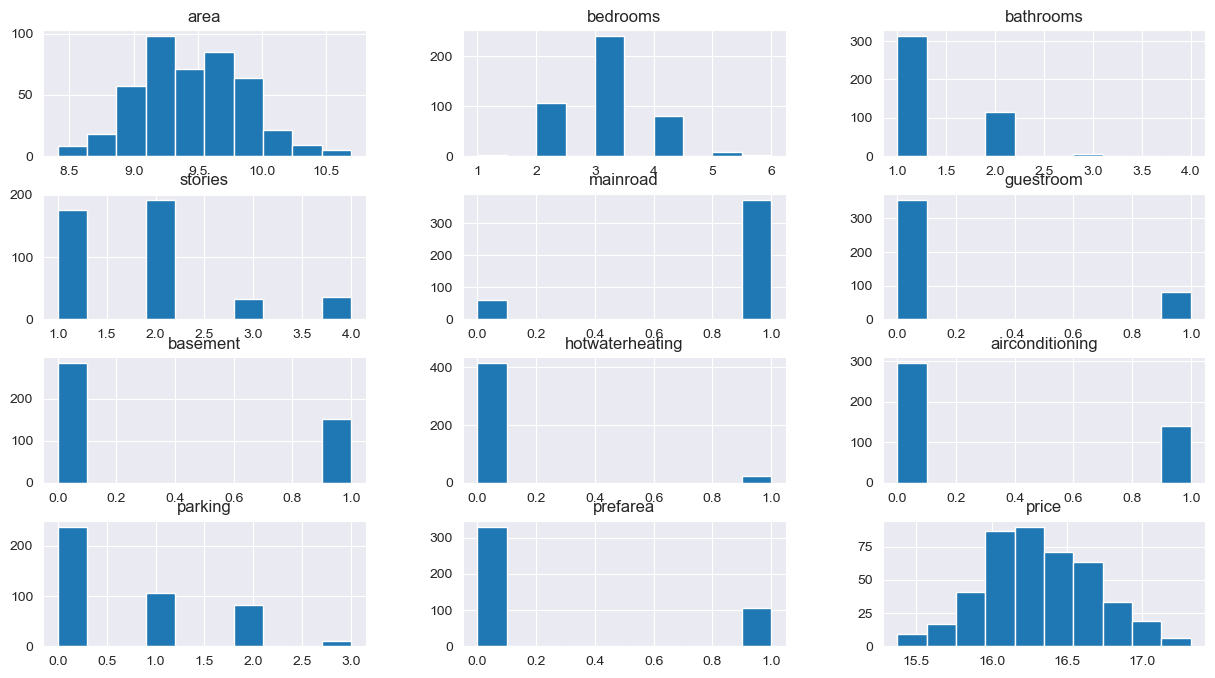

In [450]:
train_data.hist(figsize=(15,8))

In [9]:
from sklearn.linear_model import LinearRegression

xTrain, yTrain = train_data.drop(['price'], axis = 1), train_data['price']

reg = LinearRegression()

In [12]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k='all')  #k=8
selector.fit(xTrain, yTrain)
feature_scores = selector.scores_

In [10]:
test_data = xTest.join(yTest)
test_data['area'] = np.log(test_data['area']) + 1
test_data['price'] = np.log(test_data['price']) + 1
xTest, yTest = test_data.drop(['price'], axis = 1), test_data['price']

In [13]:
mask = feature_scores > 20
xTrainReduced = xTrain.loc[:, mask]
xTestReduced = xTest.loc[:, mask]

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrainReduced)
xTestScaled = scaler.transform(xTestReduced)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(xTrainScaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
# Train the model
history = model.fit(
    xTrainScaled, yTrain,
    validation_split=0.2,
    epochs=800,
    batch_size=16,
    callbacks= [early_stop],
    verbose=1
)

Epoch 1/800


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 253.5505 - mae: 15.9181 - val_loss: 252.0080 - val_mae: 15.8682
Epoch 2/800
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 251.6638 - mae: 15.8578 - val_loss: 248.4756 - val_mae: 15.7559
Epoch 3/800
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 246.5104 - mae: 15.6932 - val_loss: 244.5298 - val_mae: 15.6294
Epoch 4/800
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 242.6176 - mae: 15.5685 - val_loss: 240.0864 - val_mae: 15.4857
Epoch 5/800
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 238.6808 - mae: 15.4407 - val_loss: 234.8525 - val_mae: 15.3146
Epoch 6/800
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 232.7052 - mae: 15.2450 - val_loss: 228.7299 - val_mae: 15.1116
Epoch 7/800
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 226.6102 - mae: 15.0414 - val_loss: 221.5796 - val_mae: 14.8702
Epoch 8/800
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 219.3819 - mae: 14.7964 - val_loss: 213.5512 - val_mae: 14.5939
Epoch 9/800
22/22 ━━━━━━━━━

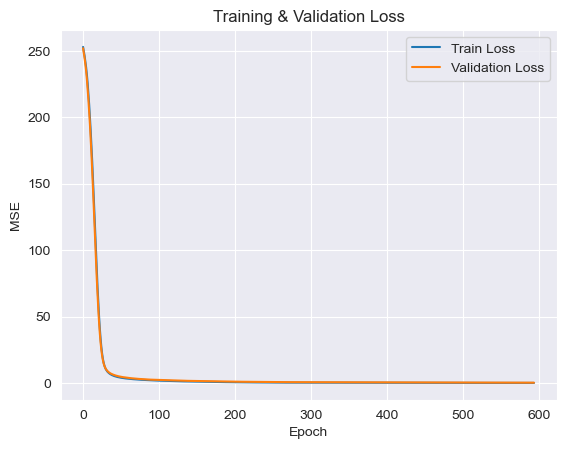

In [28]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training & Validation Loss')
plt.show()

In [29]:
from tensorflow.keras.losses import MeanAbsoluteError

baselinePrediction = [yTrain.mean()] * len(yTest)
baselineMAE = mean_absolute_error(yTest, baselinePrediction)

print(float(baselineMAE))

0.31333380524270443


In [30]:
loss, mae = model.evaluate(xTestScaled, yTest)
print(f"Test MAE: {mae:.2f}")

i = 0
xSample = xTestScaled[i].reshape(1,-1)
yTrue = yTest.iloc[i]
yPred = model.predict(xSample)[0][0]
print(f"True price: {yTrue}")
print(f"Predicted price: {yPred}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2084 - mae: 0.3097
Test MAE: 0.31
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
True price: 15.621986423831222
Predicted price: 15.52492618560791


In [33]:
model.save('model.keras')

In [479]:
reg.fit(xTrainReduced, yTrain)

LinearRegression()

In [487]:
reg.score(xTestReduced, yTest)

0.6609687532776974

In [481]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(xTrainReduced, yTrain)

RandomForestRegressor()

In [483]:
forest.score(xTestReduced, yTest)

0.6070498949306946

In [484]:
from sklearn.model_selection import GridSearchCV

paramGrid = {
    "n_estimators": [200, 300],
    "max_features": [4,8,12],
    "max_depth": [8,12,16,20],
    "min_samples_split": [2,4]
}

gridSearch = GridSearchCV(forest, paramGrid, cv=5, scoring = 'neg_mean_squared_error', return_train_score=True)

gridSearch.fit(xTrainReduced, yTrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 12, 16, 20],
                         'max_features': [4, 8, 12],
                         'min_samples_split': [2, 4],
                         'n_estimators': [200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [485]:
print(gridSearch.best_estimator_)
bestForest = gridSearch.best_estimator_

RandomForestRegressor(max_depth=8, max_features=4, n_estimators=200)


In [486]:
bestForest.score(xTestReduced, yTest)

0.6470020487981292